In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [ ]:
current_words = pd.read_csv('current_words.csv')
current_words

,Current words,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,English,father,mother,one,eight,knee,nose,tongue,dog,egg,smoke,snow,to burn,to bite,to sing,to spit,dry
1,Erzya,oćä (1),ava,vejke,kavkso,pul'aza,ńeŕ,keľ,pińe,mona,sufta,lov,kurva,poŕe,moro,śel'ge,kośke
2,Finnish,isä,emä,yksi,kahdeksan,polvi,nenä,kieli,peni,muna,savu,lumi,korpea,pure,laulaa,sylki,kuiva
3,Hungarian,ős,eme,egy,nyolc,térd,orr,nyelv,äb,tojás,füst,hó,fűl,harap,énekel,köp,asz
4,Mansi,äś,oma,äk,naləw,sāns,nël,kāləmt,āmp,mūňi,pošėm,tūjt,pēl,por,mora- (2),süľk,tōš
5,Mari (Meadow),iza,ava,ikte,känδäkšə,pul-,ner,jylme,pənə,muno,šikš,lum,eŋa,pura,muro,śəwəľ,koške
6,Saami (Northern),œčče,œbme,akta,gavce,buol'vâ,nierrâ,giellâ,bœnâ,mânne,suovvâ,lobma,guor'bâ,bǫrrâ,lávlut,čǫl'gâ,kuiwe


In [ ]:
current_words = pd.read_csv('current_words.csv')
current_words

,Proto-words,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,English,father,mother,one,eight,knee,nose,tongue,dog,egg,smoke,snow,to burn,to bite,to sing,to spit,dry
1,Erzya,*ićä,*ava,*ikte,*kakteksan,*polwe,*nere,*kele,*pene,*muna,*sawe,*lume,*korpe,*pure,*mura,*śil'ke,*kuśka
2,Finnish,*ićä,*emä,*ikte,*kakteksan,*polwe,*nenä,*kele,*pene,*muna,*sawe,*lume,*korpe,*pure,*laulu,*śil'ke,*kujwa
3,Hungarian,*ićä,*emä,*egy,*ńalɜ,*térd,*orr,*nyelv,*ämpɜ,*tojás,*pičɜ,*hó,*pilɜ,*harap,*énekel,*köp,*ϑasɜ
4,Mansi,*ićä,*emä,*ikte,*ńalɜ,*sāns,*nere,*kele,*ämpɜ,*muna,*pičɜ,*tūjt,*pilɜ,*pure,*mura,*śil'ke,*ϑasɜ
5,Mari (Meadow),*ićä,*ava,*ikte,*kakteksan,*polwe,*nere,*jylme,*pene,*muna,*šikš,*lume,*äŋɜ,*pure,*mura,*śil'ke,*kuśka
6,Saami (Northern),*ićä,*emä,*ikte,*kakteksan,*polwe,*nere,*kele,*pene,*muna,*sawe,*lume,*korpe,*pure,*laulu,*śil'ke,*kujwa


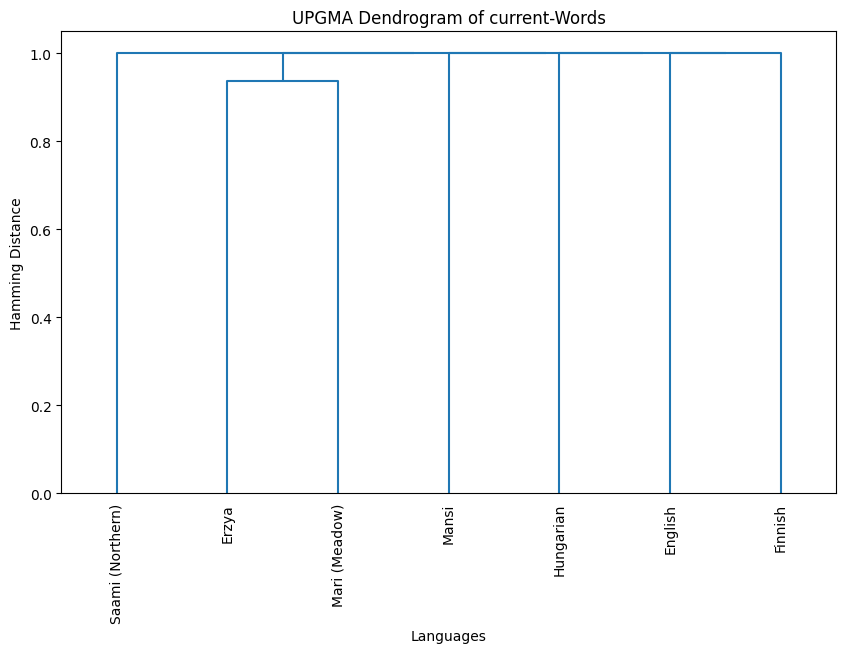

In [ ]:
# Load the dataset
current_words_path = "current_words.csv"  # Update the path if necessary
current_words_df = pd.read_csv(current_words_path)

# Extract numerical data (ignoring the first column which contains language names)
current_words_numeric = current_words_df.iloc[:, 1:]

# Encode categorical words into unique numerical identifiers
current_words_encoded = current_words_numeric.apply(lambda x: pd.factorize(x)[0])

# Compute pairwise distances using Hamming distance
# Hamming distance is suitable for categorical data
pairwise_distances = pdist(current_words_encoded.values, metric='hamming')

# Convert the distance vector to a square matrix
distance_matrix = squareform(pairwise_distances)

# Create a DataFrame for the distance matrix with appropriate labels
languages = current_words_df.iloc[:, 0]
distance_matrix_df = pd.DataFrame(distance_matrix, index=languages, columns=languages)

# Perform UPGMA clustering using the 'average' method
linked = linkage(pairwise_distances, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=languages.to_list(), leaf_rotation=90, leaf_font_size=10)
plt.title("UPGMA Dendrogram of Current Words")
plt.xlabel("Languages")
plt.ylabel("Hamming Distance")
plt.show()


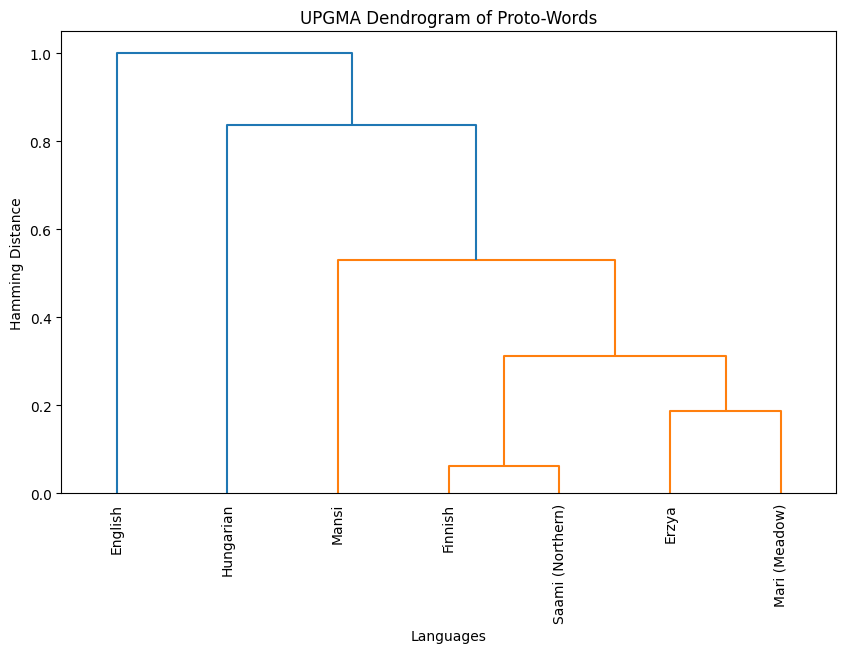

In [8]:
# Load the dataset
proto_words_path = "proto_words.csv"  # Update the path if necessary
proto_words_df = pd.read_csv(proto_words_path)

# Extract numerical data (ignoring the first column which contains language names)
proto_words_numeric = proto_words_df.iloc[:, 1:]

# Encode categorical words into unique numerical identifiers
proto_words_encoded = proto_words_numeric.apply(lambda x: pd.factorize(x)[0])

# Compute pairwise distances using Hamming distance
# Hamming distance is suitable for categorical data
pairwise_distances = pdist(proto_words_encoded.values, metric='hamming')

# Convert the distance vector to a square matrix
distance_matrix = squareform(pairwise_distances)

# Create a DataFrame for the distance matrix with appropriate labels
languages = proto_words_df.iloc[:, 0]
distance_matrix_df = pd.DataFrame(distance_matrix, index=languages, columns=languages)

# Perform UPGMA clustering using the 'average' method
linked = linkage(pairwise_distances, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=languages.to_list(), leaf_rotation=90, leaf_font_size=10)
plt.title("UPGMA Dendrogram of Proto-Words")
plt.xlabel("Languages")
plt.ylabel("Hamming Distance")
plt.show()
